# ICAN clinical data characteristics

**Objective:** view of the simulated ICAN database with a factor analysis for mixed data (FAMD).

## Library importation

In [1]:
library(FactoMineR)
library(stringr)
library(tidyverse)
library(viridis)
library(factoextra)
library(plot3D)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.2.1     v readr   1.3.1
v tibble  2.1.3     v purrr   0.3.3
v tidyr   1.0.0     v dplyr   0.8.3
v ggplot2 3.2.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'viridis' was built under R version 3.6.2"
Loading required package: viridisLite

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ



## Data loading

In [2]:
ican <- read.csv("simulated_ican_clinical_data.csv", sep = "#", encoding = "utf8")
dim(ican)

[1] 2505   28

In [3]:
ican_select <- ican[, -dim(ican)[2]] # ican_select is the database without the outcome variable "rupture"

## Method FAMD

In [4]:
res <- FAMD(ican_select, ncp = 5, graph = FALSE)

### Variables graphs

In [5]:
res_famd_var <- round(res$var$contrib[,1:3],0)
colnames(res_famd_var) <- c("Axis 1", "Axis 2", "Axis 3")
row.names(res_famd_var) <- c("Age", "BMI", "Adjusted size ratio", "Sex", "Sporadic case", "Multiple IA", "IA location", 
                             "Tobacco", "Alcohol", "HTA", "Headaches", "Diabetes", "Dyslipidemia", "Ischemic stroke history",
                             "Ischemic heart disease history", "PAD history", "Carotid artery stenosis history", 
                             "Aortic aneurysm history", "Statin treatment", "Platelet aggregation inhibiting treatment", 
                             "VKA or anticoagulant treatment", "Anti-inflammatory treatment", "Hormone therapy treatment", 
                             "Allergy", "Asthma", "Atopy", "Eczema")
data_test <- as_tibble(rownames_to_column(as.data.frame(res_famd_var), var = "Variables"))
data_test_fig <- gather(data_test, sample, value, c("Axis 1", "Axis 2", "Axis 3"))
range <- rep(c(24, 2, 14, 13, 10, 9, 15, 18, 12, 23, 11, 19, 26, 21, 22, 17, 20, 1, 27, 25, 16, 8, 7, 5, 4, 6, 3), 3)
data_test_fig$range <- range

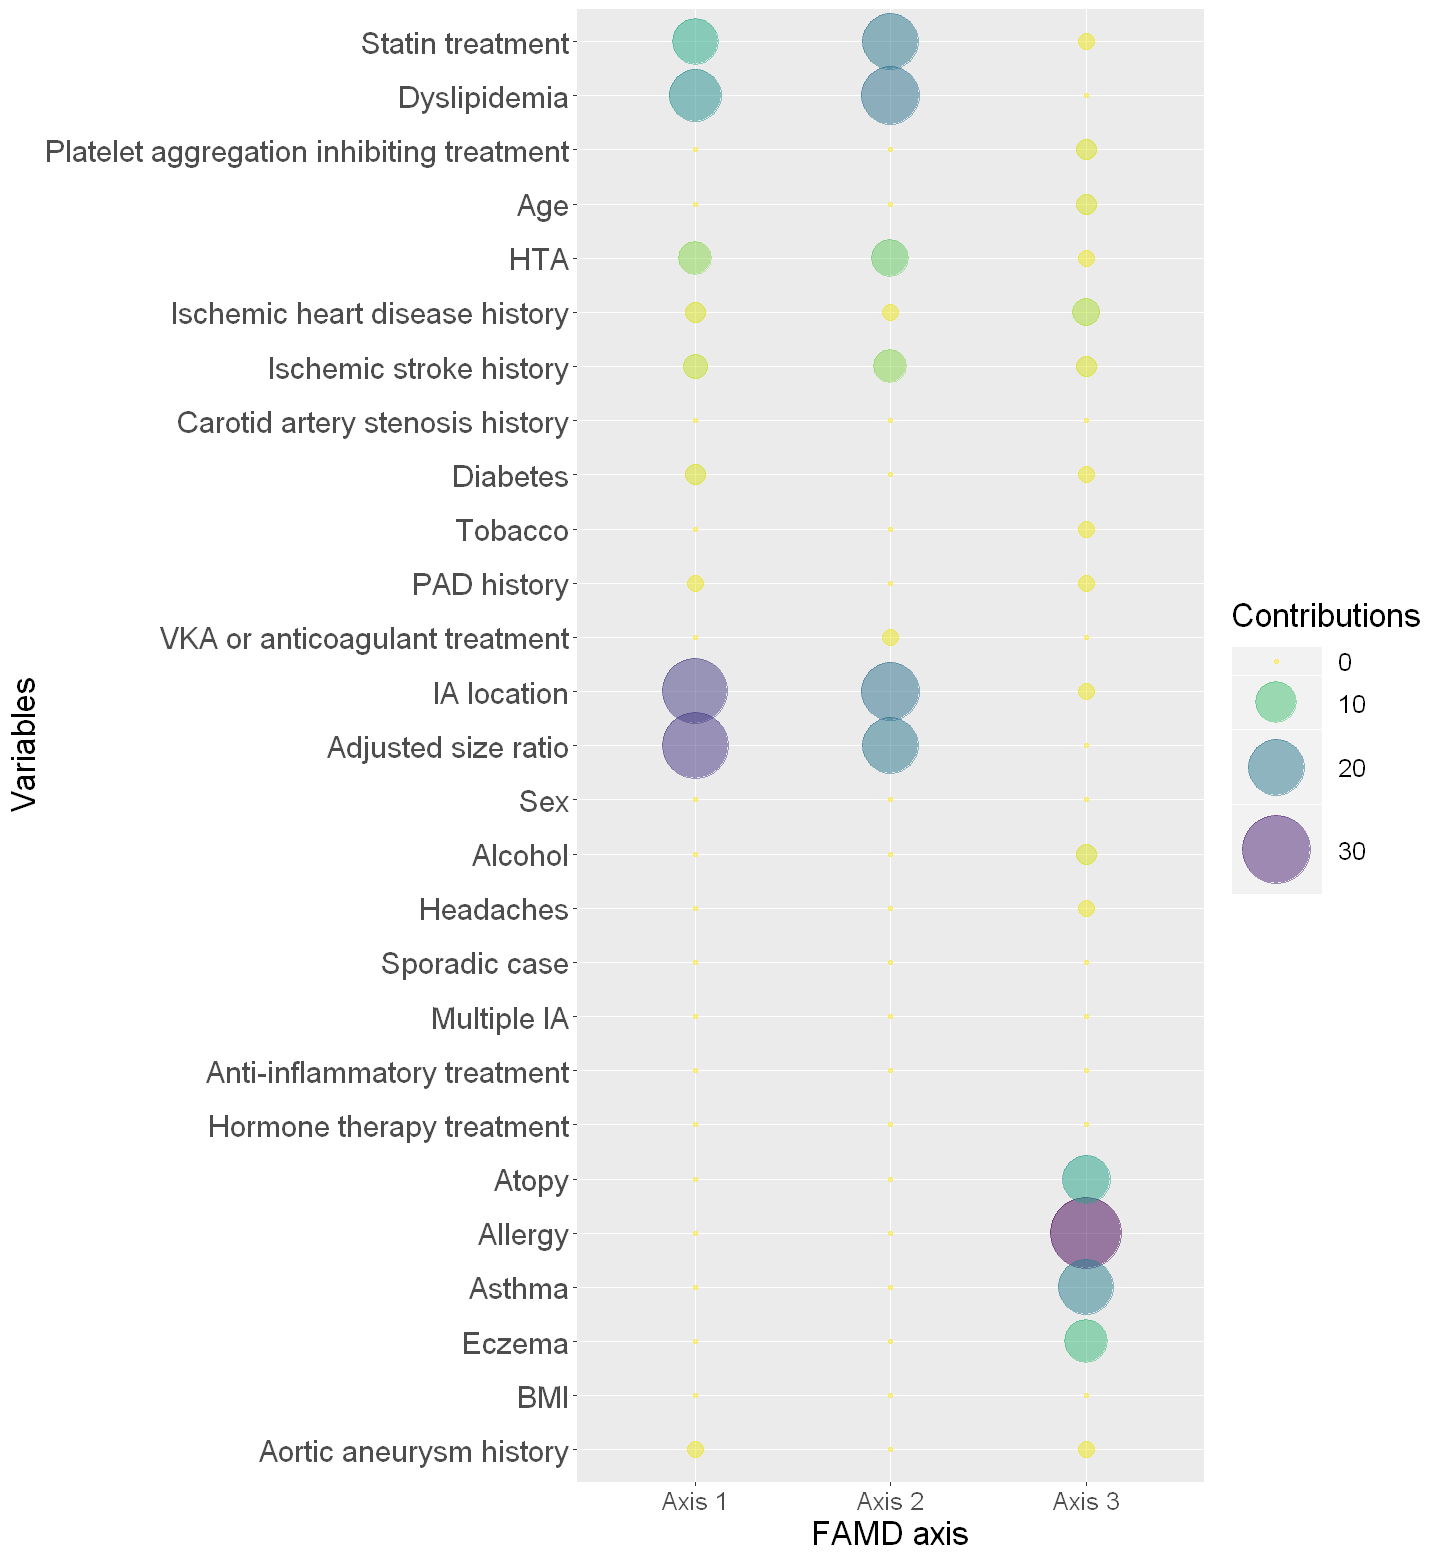

In [6]:
options(repr.plot.width = 12, repr.plot.height = 13)
data_test_fig %>% 
    ggplot(aes(x = sample, y = reorder(Variables, range), size = value, color = value)) + 
    geom_point(alpha=0.5) +
    #theme_bw() +
    scale_size(range = c(1, 20), name="Contributions")  + 
    labs(x = "FAMD axis",
         y = "Variables")  +
    theme(axis.title.y = element_text(size = 20)) +
    theme(axis.title.x = element_text(size = 20)) +
    theme(axis.text.x = element_text(size=15),
          axis.text.y = element_text(size=18))+
    theme(plot.title = element_text(size = 20, face = "bold"),
          legend.title=element_text(size=20), 
          legend.text=element_text(size=15)) +
    scale_color_viridis("Contributions", direction = -1) +
    guides(color = "legend")

### Specific individuals

In [7]:
ind <- get_famd_ind(res)
axis <- 1:3
names_val <- rep(0,3)
for (i in 1:3) {
    range <- setdiff(axis, i)
    ind_test <- ind$contrib
    while (names_val[i] == 0) {
        if ((max(ind_test[names(which(ind_test[,i] == max(ind_test[,i]))),range]) < 0.2)|(nrow(ind_test)==0)){
            if (nrow(ind_test)==0) {
                print("pb")
            } else {
                names_val[i] = names(which(ind_test[,i] == max(ind_test[,i])))
            }
        } else {
            ind_test <- ind_test[-which(ind_test[,i] == max(ind_test[,i])),]
        }
    }
}

In [8]:
ican[names_val,]

,sex,age,bmi,sporadic_case,multiple_IA,IA_location,adjusted_size_ratio,tobacco,alcohol,hta,...,statin_ttt,platelet_aggregation_inhibiting_ttt,vka_or_anticoagulant_ttt,anti_inflammatory_ttt,hormone_therapy_ttt,allergy,asthma,atopy,eczema,rupture
,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
616,M,48,23,Yes,No,ICA,0.71,Regular_smoker,< 150g,Yes,...,Yes,No,No,No,No,Yes,No,No,No,No
573,F,67,22,Yes,No,ACA,12.20,Regular_smoker,< 150g,Yes,...,Yes,No,No,No,No,No,No,No,No,No
2171,F,60,22,Yes,Yes,ICA,2.50,Non-smoker,< 150g,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No


### 3D graph

In [9]:
res2 <- as.data.frame(res$ind$coord)
res2["rupture"] <- ican$rupture
color_3D <- 1:length(res2$rupture)
color_3D <- replace(color_3D, which(res2$rupture == "Yes"), "salmon")
color_3D <- replace(color_3D, which(res2$rupture == "No"), "turquoise2")
cex_3D <- rep(1,length(res2$rupture))
lwd_3D <- rep(1,length(res2$rupture))
ind <- c()
j <- 1
for(i in names_val) {
    color_3D[which(row.names(res2) == i)] <- "black"
    ind[j] <- which(row.names(res2) == i)
    cex_3D[which(row.names(res2) == i)] <- 1.5
    j <- j+1
}

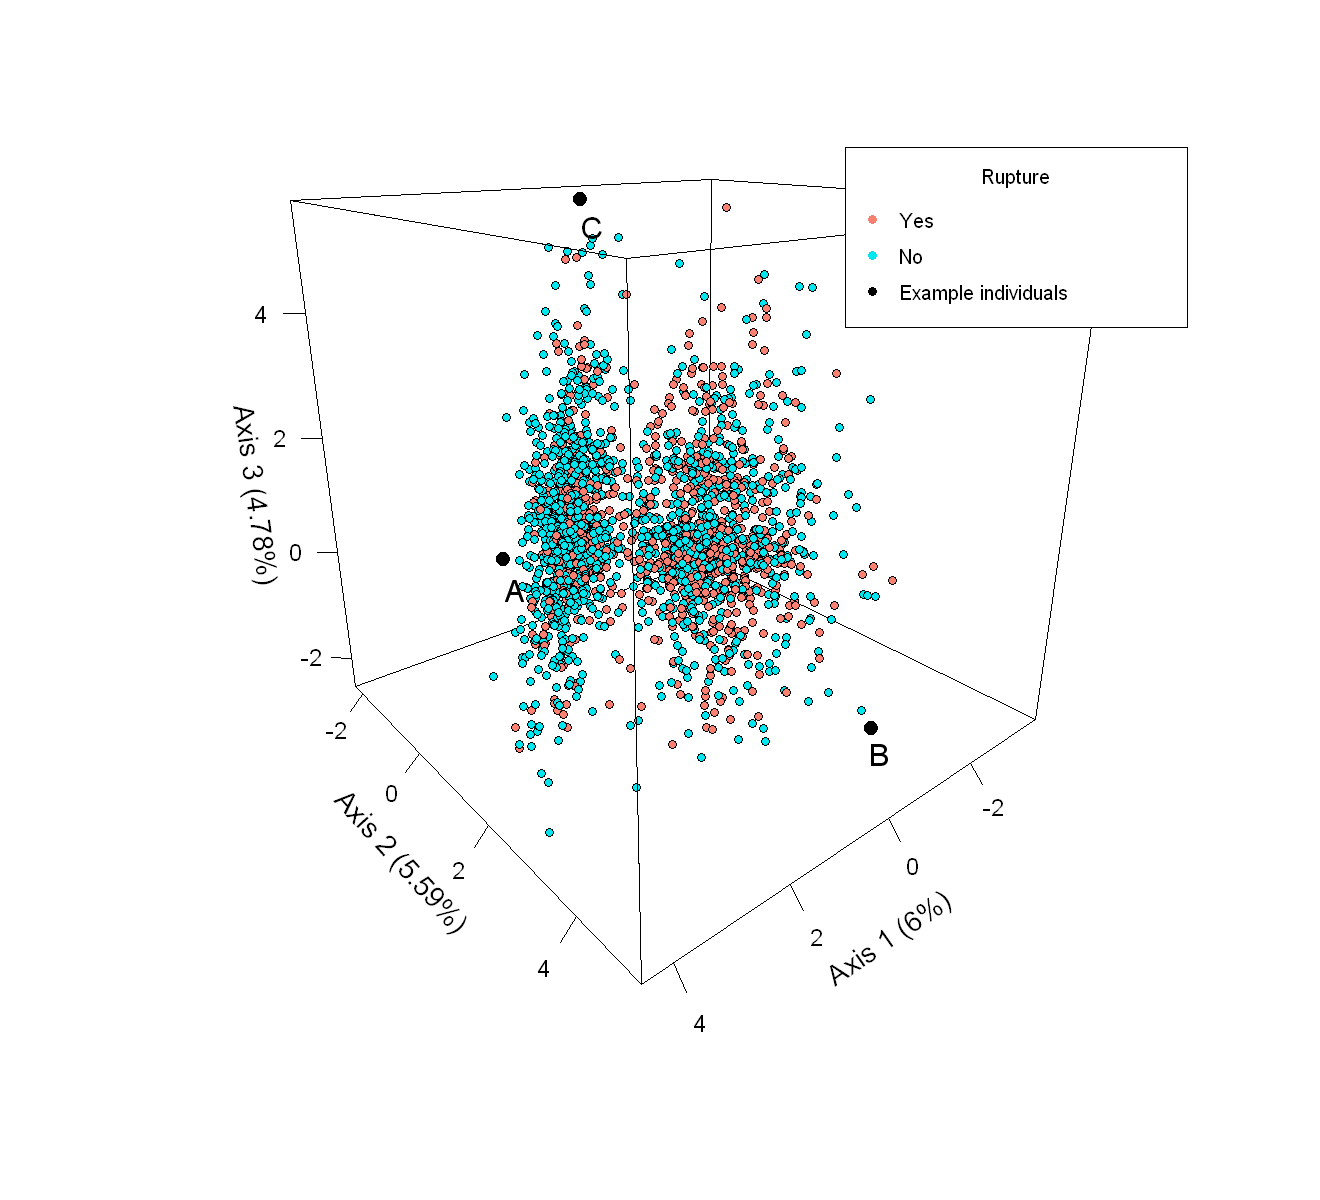

In [10]:
options(repr.plot.width = 11, repr.plot.height = 10)
scatter3D(res2[,1], res2[,2], res2[,3], pch = 21, cex.axis = 1.2, cex.lab = 1.4,  cex = cex_3D,
          col = "black", bg = color_3D, colkey = FALSE, cex = 1.2, lwd = lwd_3D,
          xlab = paste0("Axis 1 (", round(res$eig[1,2], 2) ,"%)"), 
          ylab = paste0("Axis 2 (", round(res$eig[2,2], 2) ,"%)"), 
          zlab = paste0("Axis 3 (", round(res$eig[3,2], 2) ,"%)"), 
          ticktype = "detailed",
          phi = 20, theta = 140,
          bty = "f")
text3D(x = res2[names_val[1],1], res2[names_val[1],2], res2[names_val[1],3] - 0.4, cex = 1.5,
       colkey = FALSE, add = TRUE, 
       labels = "A", col = "black", lwd = 2)
text3D(x = res2[names_val[2],1], res2[names_val[2],2], res2[names_val[2],3] - 0.4, cex = 1.5,
       colkey = FALSE, add = TRUE, 
       labels = "B", col = "black", lwd = 2)
text3D(x = res2[names_val[3],1], res2[names_val[3],2], res2[names_val[3],3] - 0.4, cex = 1.5,
       colkey = FALSE, add = TRUE, 
       labels = "C", col = "black", lwd = 2)
legend("topright", legend = c("Yes", "No", "Example individuals"), col =  c("salmon", "turquoise2", "black"), pch = 16, 
       title = "Rupture", cex = 1)